## Upload data

In [1]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Preprocessing

In [2]:
from sklearn.preprocessing import StandardScaler
import numpy as np

df = df[df['SkinThickness'] != 0]

print('Shape of DataFrame:',df.shape)
print('Labels:',df['Outcome'].value_counts())

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X = np.array(X)
y = np.array(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

Shape of DataFrame: (541, 9)
Labels: Outcome
0    361
1    180
Name: count, dtype: int64


## Spliting

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_test.shape, X_train.shape)

(109, 8) (432, 8)


## Calculate Metrics Function

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

    p = precision_score(y_true=y_test, y_pred=y_pred_test)
    
    r = recall_score(y_true=y_test, y_pred=y_pred_test)

    print(f'acc train:{acc_train} , acc test:{acc_test}')
    print(f'precision:{p}')
    print(f'recall:{r}')

    return acc_train, acc_test, p, r

## Models

#### 1.Nave Bayes

In [5]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train:0.7685185185185185 , acc test:0.7339449541284404
precision:0.47368421052631576
recall:0.6666666666666666


#### 2.KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train:0.8518518518518519 , acc test:0.7889908256880734
precision:0.5625
recall:0.6666666666666666


#### 3. Decision Tress

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=9)
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train:0.8333333333333334 , acc test:0.7981651376146789
precision:0.5925925925925926
recall:0.5925925925925926


#### 4. Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=8)
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train:0.9814814814814815 , acc test:0.8165137614678899
precision:0.64
recall:0.5925925925925926


#### 5. SVM

In [9]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train:0.8495370370370371 , acc test:0.7614678899082569
precision:0.5161290322580645
recall:0.5925925925925926


#### 6. Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train, y_train)

y_pred_train = lg.predict(X_train)
y_pred_test = lg.predict(X_test)

acc_train_lg, acc_test_lg, p_lg, r_lg = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train:0.7870370370370371 , acc test:0.7614678899082569
precision:0.5185185185185185
recall:0.5185185185185185


#### 7. ANN

In [11]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=256)
ann.fit(X_train, y_train)

y_pred_train = ann.predict(X_train)
y_pred_test = ann.predict(X_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train:0.8402777777777778 , acc test:0.7522935779816514
precision:0.5
recall:0.5185185185185185


C:\Users\lenovo\miniconda3\envs\numpy_course\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### 8. AdaBoost

In [12]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
ab.fit(X_train, y_train)

y_pred_train = ab.predict(X_train)
y_pred_test = ab.predict(X_test)

acc_train_ab, acc_test_ab, p_ab, r_ab = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train:0.7916666666666666 , acc test:0.8165137614678899
precision:0.6521739130434783
recall:0.5555555555555556


#### 9. Gradient Boosting

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, subsample=0.3)
gb.fit(X_train, y_train)

y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)

acc_train_gb, acc_test_gb, p_gb, r_gb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train:0.9375 , acc test:0.7889908256880734
precision:0.5666666666666667
recall:0.6296296296296297


#### 10. XGBoost

In [14]:
import xgboost as xgb

xgb = xgb.XGBClassifier(n_estimators=80, learning_rate=0.1, max_depth=2, random_rate=42)
xgb.fit(X_train, y_train)

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

acc_train_xgb, acc_test_xgb, p_xgb, r_xgb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train:0.8541666666666666 , acc test:0.8165137614678899
precision:0.6521739130434783
recall:0.5555555555555556


C:\Users\lenovo\miniconda3\envs\numpy_course\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:44:04] WARNING: D:\bld\xgboost-split_1755048450370\work\src\learner.cc:738: 
Parameters: { "random_rate" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## Conclusion

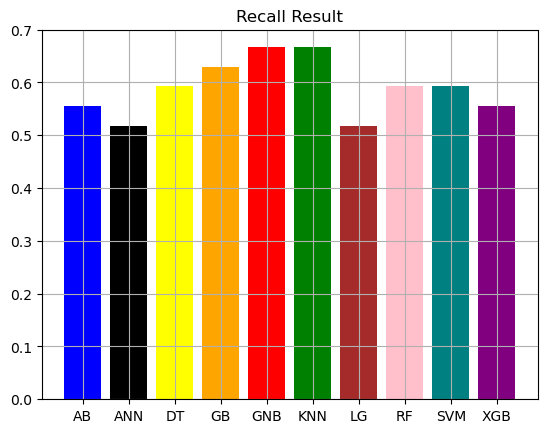

In [15]:
import matplotlib.pyplot as plt

recall_result = [r_ab ,r_ann, r_dt, r_gb, r_gnb, r_knn, r_lg, r_rf, r_svm, r_xgb]

colors = ['blue', 'black', 'yellow', 'orange', 'red', 'green', 'brown', 'pink', 'teal', 'purple']
title = ['AB', 'ANN', 'DT', 'GB', 'GNB', 'KNN', 'LG', 'RF', 'SVM', 'XGB']

plt.bar(title, recall_result, color=colors)
plt.title('Recall Result')
plt.grid()
plt.show()

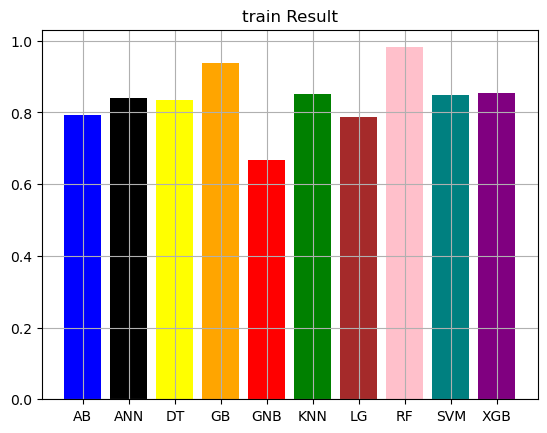

In [17]:
recall_result = [acc_train_ab ,acc_train_ann, acc_train_dt, acc_train_gb, r_gnb, acc_train_knn, acc_train_lg, acc_train_rf, acc_train_svm, acc_train_xgb]

colors = ['blue', 'black', 'yellow', 'orange', 'red', 'green', 'brown', 'pink', 'teal', 'purple']
title = ['AB', 'ANN', 'DT', 'GB', 'GNB', 'KNN', 'LG', 'RF', 'SVM', 'XGB']

plt.bar(title, recall_result, color=colors)
plt.title('Train Result')
plt.grid()
plt.show()

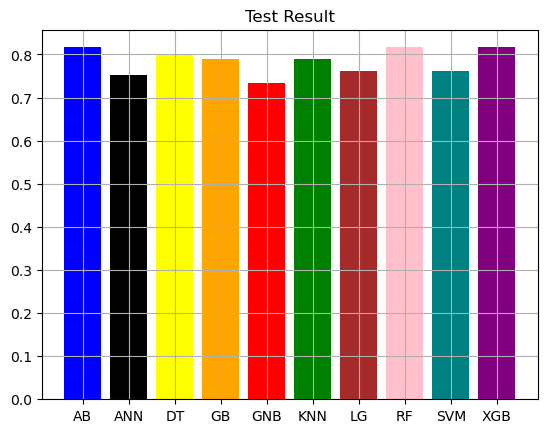

In [18]:
recall_result = [acc_test_ab ,acc_test_ann, acc_test_dt, acc_test_gb, acc_test_gnb, acc_test_knn, acc_test_lg, acc_test_rf, acc_test_svm, acc_test_xgb]

colors = ['blue', 'black', 'yellow', 'orange', 'red', 'green', 'brown', 'pink', 'teal', 'purple']
title = ['AB', 'ANN', 'DT', 'GB', 'GNB', 'KNN', 'LG', 'RF', 'SVM', 'XGB']

plt.bar(title, recall_result, color=colors)
plt.title('Test Result')
plt.grid()
plt.show()

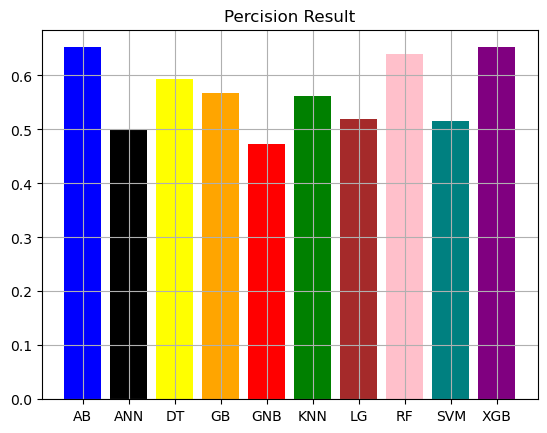

In [20]:
recall_result = [p_ab ,p_ann, p_dt, p_gb, p_gnb, p_knn, p_lg, p_rf, p_svm, p_xgb]

colors = ['blue', 'black', 'yellow', 'orange', 'red', 'green', 'brown', 'pink', 'teal', 'purple']
title = ['AB', 'ANN', 'DT', 'GB', 'GNB', 'KNN', 'LG', 'RF', 'SVM', 'XGB']

plt.bar(title, recall_result, color=colors)
plt.title('Percision Result')
plt.grid()
plt.show()